In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# checking for null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 1. How many are suffering from heart disease? Also plot the stats

In [5]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
print('No. of patients suffering from heart disease: {}'.format(data.target.value_counts().values[0]))

No. of patients suffering from heart disease: 165


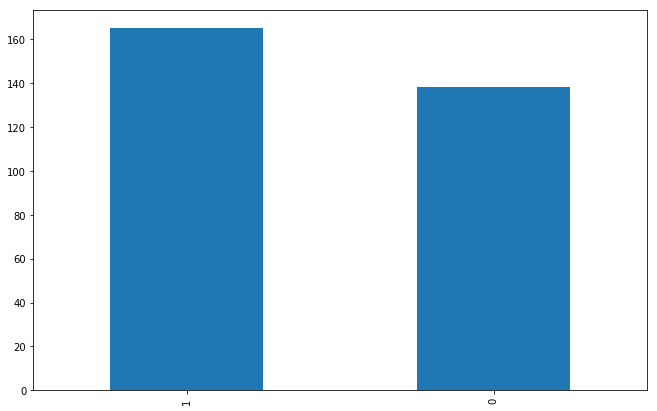

In [7]:
data.target.value_counts().plot(kind='bar',figsize=(11,7))

## 2. How many males and females have heart disease out of total?

In [8]:
df = pd.DataFrame(data.groupby('sex').target.value_counts())
df.rename(columns={'target':'count'},inplace = True)
df = df.reset_index()
df[df['target']==1].set_index('sex').loc[:,['count']]

,count
sex,
0,72
1,93


There are 72 females with heart disease and 93 males with heart disease.

In [9]:
print('Out of total, {:.2f}% of Males are suffering from heart disease \n {:.2f}% of Females are suffering from heart disease'.format((93/(93+72))*100,(72/(72+93))*100))

Out of total, 56.36% of Males are suffering from heart disease 
 43.64% of Females are suffering from heart disease


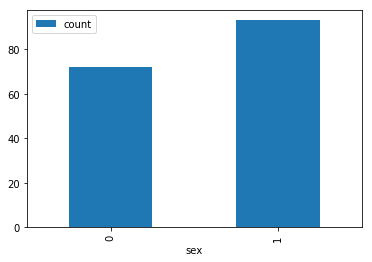

In [10]:
df[df['target']==1].set_index('sex').loc[:,['count']].plot(kind='bar')

In [11]:
data.groupby('sex').target.value_counts(normalize=True)

sex  target
0    1         0.750000
     0         0.250000
1    0         0.550725
     1         0.449275
Name: target, dtype: float64

Out of all females, 75% of them are suffering from heart disease and out of all males, 44% of them are suffering from heart disease.

## 3. Visualize frequency distribution of the thalach variable and find what's the heart rate and heart disease relation?

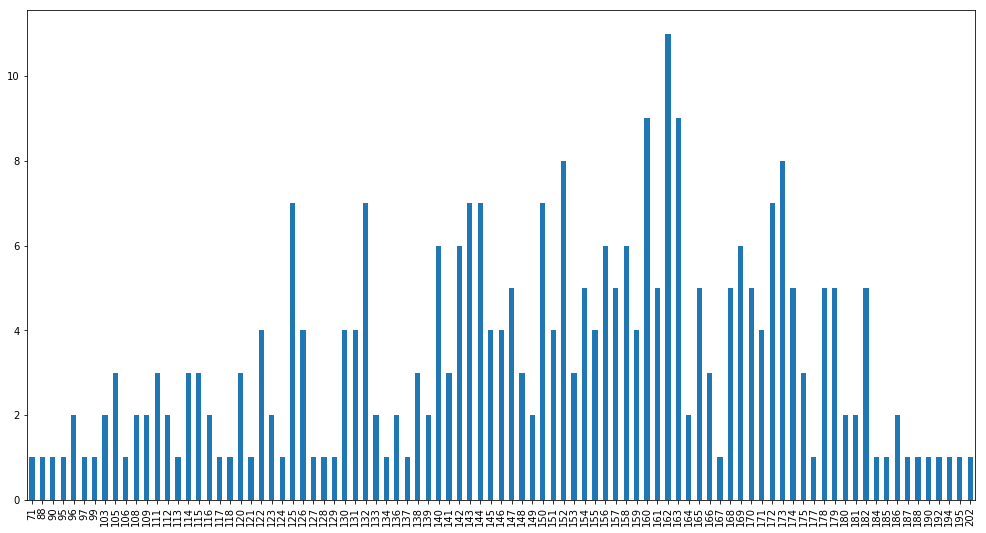

In [12]:
# Frequency distribution of the thalach variable
plt.figure(figsize=(17,9))
data.thalach.value_counts().sort_index().plot(kind='bar')

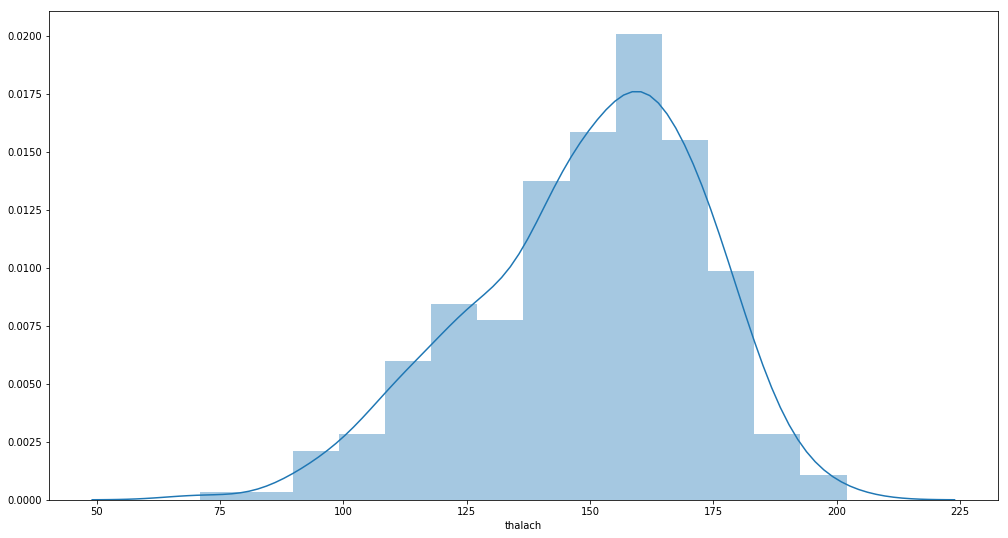

In [13]:
plt.figure(figsize=(17,9))
sns.distplot(data.thalach)

There are more people with the heart rate ranges from 140 to 180.

In [14]:
# relation between heart rate and heart disease
data.groupby('target').thalach.agg(['mean'])

,mean
target,
0,139.101449
1,158.466667


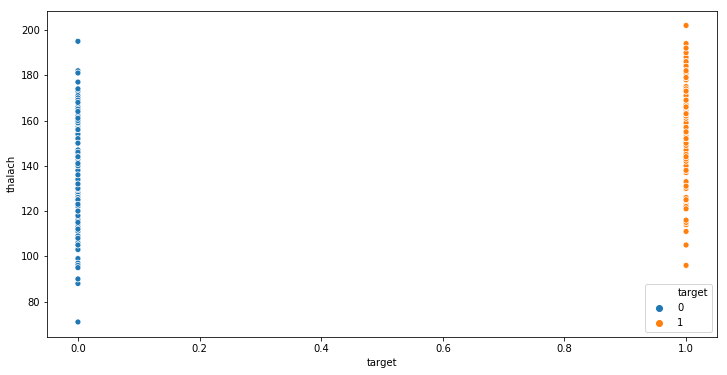

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data.target,y=data.thalach,hue=data.target,data=data)

Patients with heart disease are having more heart rate than the patients with no heart disease.

## 4. Find correlation matrix for all the variables with target.

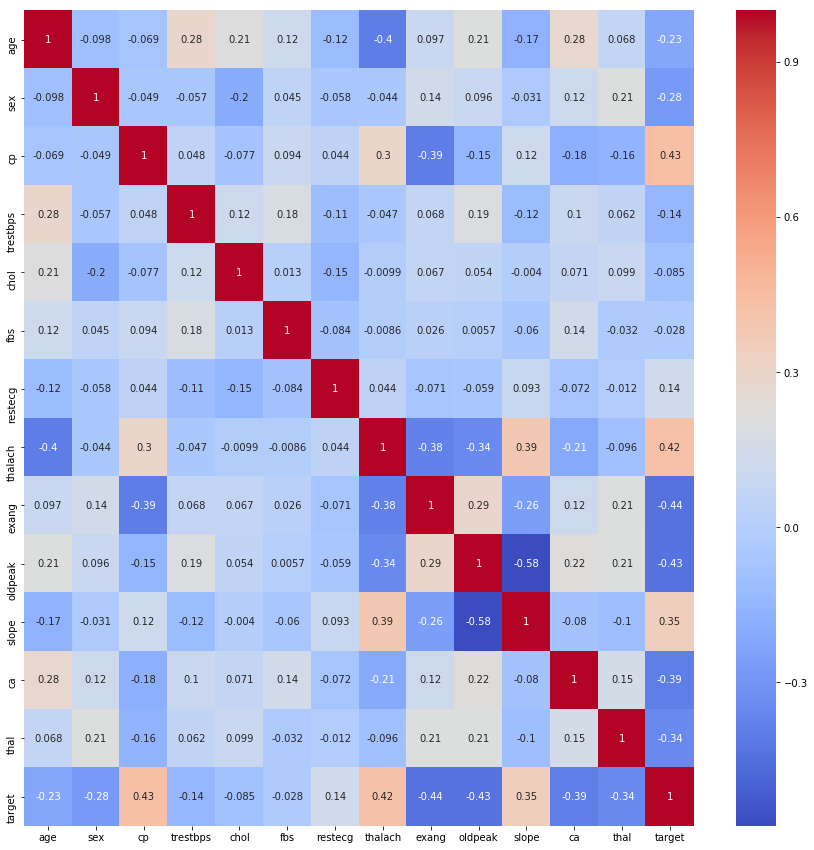

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Text(0, 0.5, 'Correlation Value')

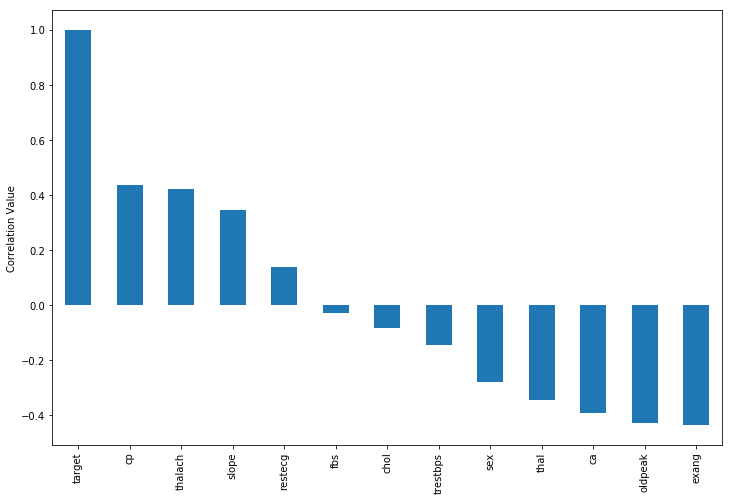

In [17]:
plt.figure(figsize=(12,8))
data[data.columns[1:]].corr()['target'][:].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Correlation Value')

Features such as 'cp', 'thalach' and 'slope' are positively correlated to our target variable and 'exang', 'oldpeak', 'ca' and 'thal' are negatively correlated.

## 5. Find Mean,Min & Max of age and plot its distribution.

In [18]:
data.age.agg(['mean','min','max'])

mean    54.366337
min     29.000000
max     77.000000
Name: age, dtype: float64

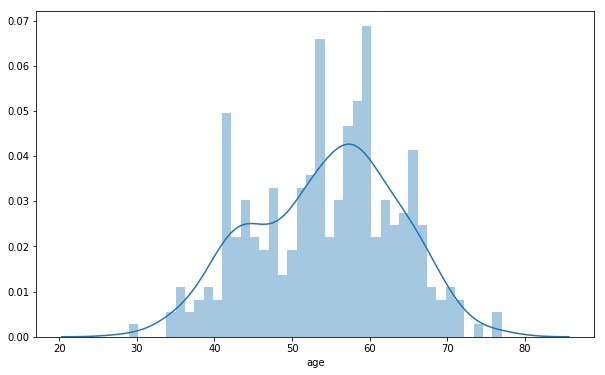

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(data.age,bins=40)

## 6. Age and its relation to heart disease. Are young people more prone to heart disease?

In [20]:
data['age_category'] = ["Young" if age <= 45 else "Old" for age in data.age]

In [21]:
data['age_category']

0        Old
1      Young
2      Young
3        Old
4        Old
       ...  
298      Old
299    Young
300      Old
301      Old
302      Old
Name: age_category, Length: 303, dtype: object

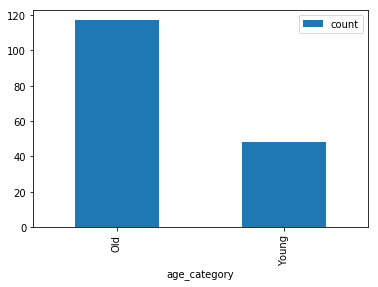

In [22]:
age_target = pd.DataFrame(data.groupby('age_category').target.value_counts())
age_target.rename(columns={'target':'count'},inplace = True)
age_target = age_target.reset_index()
age_target[age_target['target']==1].set_index('age_category').loc[:,['count']].plot(kind='bar')

No, Old persons are more prone to heart disease. 

## 7. Plot chest pain type pie chart.

#### Chest Pain types 
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

In [23]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

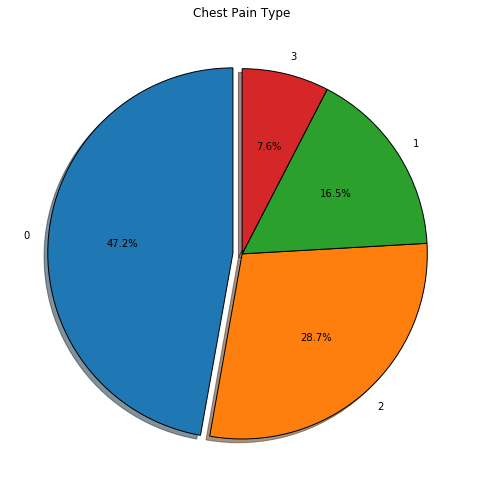

In [24]:
slices = data.cp.value_counts().values
labels = data.cp.value_counts().index
plt.figure(figsize=(10,7))
explode = [0.05,0.0,0.0,0.0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Chest Pain Type")
plt.tight_layout()
plt.show()

47.2% of patients have chest pain type of typical angina

## 8. What is the max heart rate achieved in non heart disease patients?

In [25]:
data.groupby('target').thalach.agg('max')

target
0    195
1    202
Name: thalach, dtype: int64

In [26]:
data.groupby('target').thalach.agg('max').value_counts().head(1)

195    1
Name: thalach, dtype: int64

In [27]:
max_thalach = pd.DataFrame(data.groupby('target').thalach.agg('max'))
max_thalach = max_thalach.reset_index().head(1)
max_thalach

,target,thalach
0,0,195


In [28]:
print('Maximum heart rate achieved in non heart disease patients is {}'.format(int(max_thalach.thalach.values)))

Maximum heart rate achieved in non heart disease patients is 195
